In [1]:
%matplotlib inline
import os
import collections
import pynbody
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u

In [2]:
from cog import compute_cog
from snap_io import load_moria_sim_and_kicked, load_moria, load_kicked, load_sim

In [3]:
def get_cog(sim_dir):
    sim = load_sim(sim_dir)
    print("Loaded {} snaps of sim: {}".format(len(sim), sim_dir))
    times, cog = compute_cog(sim, save_cache=False, verbose=False);
    return times, cog

def get_cog_kicked(sim_number, family=None):
    kicked_sim = load_kicked(sim_number)
    print("Loaded {} snaps of sim{}".format(len(kicked_sim), sim_number))
    
    if family is None:
        times, cog = compute_cog(kicked_sim, cache_file='cog{}_kicked.npz'.format(sim_number), verbose=False);
    else:
        if family == 'all':
            family = ["tot", 'dm', 'g', 's']
        elif not isinstance(family, collections.Iterable):
            family = [family]
        cog = dict()
        for f in family:
            print(f)
            times, cog[f] = compute_cog(kicked_sim, 
                                        cache_file='cog{}_kicked.npz'.format(sim_number), 
                                        verbose=False, 
                                        family=f if f is not "tot" else None);
    return times, cog

In [4]:
def sim_cog(sim):
    mass = sim['mass']
    pos = sim['pos']
    cog = np.sum(mass * pos.transpose(), axis=1) / mass.sum()
    return cog

In [5]:
def plot_cog_path(cog_kicked, ax=None, apoapsis=1000, periapsis=200):
    marker_dict = {"s": "*", "dm": "x", "g": "^", "tot": "o"}
    if ax is None:
        ax = plt.gca()
    ax.set_xlabel("x (kpc)")
    ax.set_ylabel("y (kpc)")
    if isinstance(cog_kicked, dict):
        for name, cog in cog_kicked.items():
            ax.scatter(*cog[:2], marker=marker_dict[name], label=name)
    else:
        ax.scatter(*cog_kicked[:2], marker='o')
    ax.plot((0,0), '')
    c1, c2 = plt.Circle((0,0), radius=apoapsis, fill=False), plt.Circle((0,0), radius=periapsis, fill=False)
    ax.add_artist(c1)
    ax.add_artist(c2)
    ax.axis('equal')
    ax.grid()
#     r = np.sqrt(cog_kicked[0,:]**2+cog_kicked[1,:]**2+cog_kicked[2,:]**2)
#     print(r[:-10].min(), r.max())

In [7]:
# sim_list = (60003, 62002, 68002, 71002)
# sim_list = (60003,)
sim_list = ("69002_p200.0_a600.0_r600.0_c8.15","69002_p200.0_a1000.0_r800.0_c8.15")

In [ ]:
sim = sim_list[0]

In [8]:
times_list = list()
cog_list = list()
for sim in sim_list:
    times, cog = get_cog_kicked(sim, 'all')
    times_list.append(times)
    cog_list.append(cog)
import gc
gc.collect()

Loaded 76 snaps of sim69002_p200.0_a600.0_r600.0_c8.15
tot
dm
g
s
Loaded 95 snaps of sim69002_p200.0_a1000.0_r800.0_c8.15
tot
dm
g
s


17484

In [9]:
len(cog_list)

2

Link the SFH
Velocity dispersion
Re (half light radius)



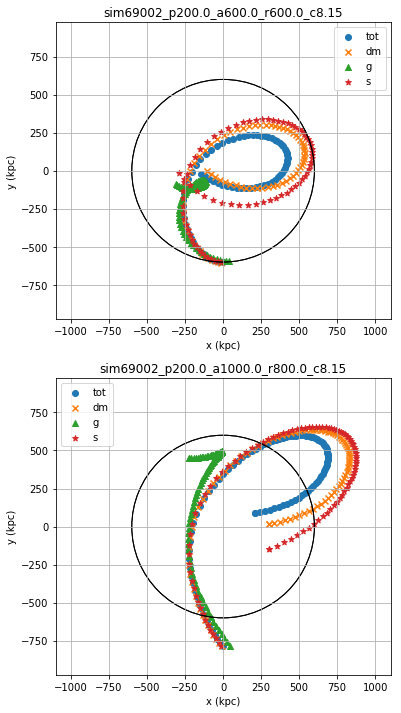

In [10]:
nplots = len(sim_list)
fig, axes = plt.subplots(nplots, figsize=(6,6*nplots))
for cog, sim, ax in zip(cog_list, sim_list, axes if nplots > 1 else [axes]):
    plot_cog_path(cog, ax, apoapsis=600, periapsis=600)
    ax.set_xlim(-1100, 1100)
    ax.set_ylim(-1100, 1100)
    ax.set_title("sim{}".format(sim))
    ax.legend()

## Just to check, my old simulation

In [10]:
times, cog = get_cog("/home/michele/sim/nfw_negative/out")

Loaded 96 snaps of sim: /home/michele/sim/nfw_negative/out


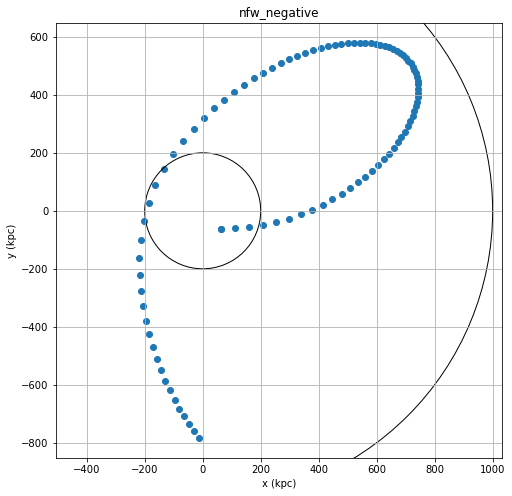

In [11]:
fig, ax = plt.subplots(1, figsize=(8,8))
plot_cog_path(cog, ax)
ax.set_title("{}".format("nfw_negative"));